<a href="https://colab.research.google.com/github/ishikalamba222/GRIP-TASK-7/blob/main/GRIP_TASK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 7- Stock Market Prediction using
Numerical and Textual Analysis.Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines(BY-ISHIKA LAMBA)


USING LSTM

DATASETS USED:
HISTORICAL STOCK PRICES=https://finance.yahoo.com/  
TEXTUAL NEWS HEADLINES=https://bit.ly/36fFPI6

IMPORTING THE LIBRARIES

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
%pylab inline


!pip install scikit-learn==0.23.2

Populating the interactive namespace from numpy and matplotlib


DATASET USED- IMPORTED STOCK PRICES FROM PAST FIVE YEARS

IMPORTING THE DATASET

In [94]:
dataset=pd.read_csv('all_stocks_5yr.csv')


KNOWING DATA

In [95]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [96]:
dataset.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


CHECKING IF OUR DATA HAS ANY NON APPLICABLE VALUE

In [97]:
dataset.isna().any()

date      False
open       True
high       True
low        True
close     False
volume    False
Name      False
dtype: bool

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [103]:
dataset.drop(['Name'],axis=1)

,date,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323


In [105]:
dataset.shape

(619040, 7)

CHECKING NULL VALUES

In [104]:
dataset.isnull()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
619035,False,False,False,False,False,False,False
619036,False,False,False,False,False,False,False
619037,False,False,False,False,False,False,False
619038,False,False,False,False,False,False,False


PLOTTING GRAPH FOR OPEN VALUES OF STOCK

In [106]:
dataset['open'].plot(figsize=(16,6))


CONVERTING ALL COUMNS INTO SIMILAR DATA TYPE

In [107]:
dataset['volume']=dataset['volume'].astype(str).str.replace(',','').astype(float)

CALCULATING SEVEN DAYS ROLLING

In [108]:
dataset.rolling(7).mean().head(20)  #for every single stock prediction we collect all data from 7 days a

,open,high,low,close,volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,14.558571,14.815714,14.058571,14.412857,1.350533e+07
7,14.430000,14.692857,13.847143,14.210000,1.440786e+07
8,14.248571,14.541429,13.652857,14.054286,1.484216e+07
9,14.122857,14.411429,13.525714,13.954286,1.454864e+07


In [109]:
dataset['close:30 Day Mean']=dataset['close'].rolling(window=30).mean()
dataset[['close','close:30 Day Mean']].plot(figsize(16,6))

DATA PREPROCESSING

CREATING FIRST DATAFRANE

In [110]:
training_data=dataset['open']
training_data=pd.DataFrame(training_data)

In [111]:
training_data

,open
0,15.07
1,14.89
2,14.45
3,14.30
4,14.94
...,...
619035,76.84
619036,77.53
619037,76.64
619038,72.74


FEATURE SCALING

In [112]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_data_scaled=sc.fit_transform(training_data)


CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND I OUTPUT


In [113]:
x_train=[]    #we take data from day 1 to day 60 and make the prediction on 61 day
y_train=[]
for i in range(60,1258):
  x_train.append(training_data_scaled[i-60:i,0])
  y_train.append(training_data_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


RESHAPING

In [114]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [115]:
x_train

array([[[0.00658545],
        [0.00649732],
        [0.00628189],
        ...,
        [0.00739334],
        [0.00754022],
        [0.00755491]],

       [[0.00649732],
        [0.00628189],
        [0.00620844],
        ...,
        [0.00754022],
        [0.00755491],
        [0.00760387]],

       [[0.00628189],
        [0.00620844],
        [0.0065218 ],
        ...,
        [0.00755491],
        [0.00760387],
        [0.00753533]],

       ...,

       [[0.0224444 ],
        [0.02246888],
        [0.02193519],
        ...,
        [0.02488763],
        [0.02519609],
        [0.02564655]],

       [[0.02246888],
        [0.02193519],
        [0.02165611],
        ...,
        [0.02519609],
        [0.02564655],
        [0.02539684]],

       [[0.02193519],
        [0.02165611],
        [0.02155329],
        ...,
        [0.02564655],
        [0.02539684],
        [0.0246624 ]]])

DATA PREPROCESSING

BUILDUING THE RNN

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [118]:
regressor=Sequential()

TRAINING NEURAL NETWORK

ADDING FIRST LSTM LAYER

In [119]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))


ADDING SECOND LSTM LAYER

In [120]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

ADDING THIRD LSTM LAYER

In [121]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

ADDING FOUTH LSTM LAYER

In [123]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

ADDING THE OUTPUT LAYER

In [122]:
regressor.add(Dense(units=1))

COMPILING THE RNN

In [124]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
#optimizer can greatly affect how fast algorithm converges to the minimum value


FITTING THE RNN TO TRAINING SET

In [125]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)
#An epoch is a term used in machine learning and indicates the number of passes
#of the entire training dataset the machine learning algorithm has completed. ...# If the batch size is the whole training dataset then the number of epochs is the number of iterations.

#batchsize is number of training samples utilized in single iteration

Epoch 1/100
38/38 [==============================] - 11s 107ms/step - loss: 2.0892e-04
Epoch 2/100
38/38 [==============================] - 4s 106ms/step - loss: 9.3304e-05
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 9.1448e-05
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 9.0086e-05
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 8.6057e-05
Epoch 6/100
38/38 [==============================] - 4s 107ms/step - loss: 8.0142e-05
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 8.1926e-05
Epoch 8/100
38/38 [==============================] - 4s 106ms/step - loss: 7.6973e-05
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 7.7712e-05
Epoch 10/100
38/38 [==============================] - 4s 106ms/step - loss: 7.5480e-05
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 7.5892e-05
Epoch 12/100
38/38 [==============================]

  MAKING PREDICTIONS 

GETTING THE REAL PRICE OF STOCKS

In [126]:
dataset_test=pd.read_csv('all_stocks_5yr.csv',index_col='date',parse_dates=True)


In [127]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [128]:
dataset_test.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [129]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    619029 non-null  float64
 1   high    619032 non-null  float64
 2   low     619032 non-null  float64
 3   close   619040 non-null  float64
 4   volume  619040 non-null  int64  
 5   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [132]:
dataset.drop(['Name'],axis=1)

,date,open,high,low,close,volume,close:30 Day Mean
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,NaN
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259.0,75.069333
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187.0,75.202000
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031.0,75.239333
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323.0,75.272333


In [133]:
dataset['volume']=dataset['volume'].astype(str).str.replace(',','').astype(float)

In [136]:
test_set=dataset_test['open']
test_set=pd.DataFrame(test_set)

In [138]:
test_set

,open
date,
2013-02-08,15.07
2013-02-11,14.89
2013-02-12,14.45
2013-02-13,14.30
2013-02-14,14.94
...,...
2018-02-01,76.84
2018-02-02,77.53
2018-02-05,76.64


In [139]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    619029 non-null  float64
dtypes: float64(1)
memory usage: 9.4 MB


In [143]:
dataset_total=pd.concat((dataset['open'],dataset_test['open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

VISUALISING THE RESULTS

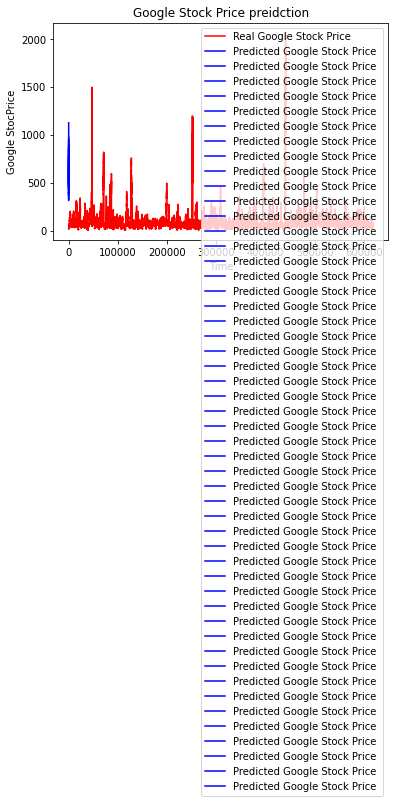

In [150]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price ')
plt.title('Google Stock Price preidction')
plt.xlabel('Time')
plt.ylabel('Google StocPrice')
plt.legend()
plt.show()
